# E-Commerce Analytics - Customer Segmentation

#### In this project, I will analyze and segment the customers of an e-commerce company by using the RFM approach and K-Means Clustering. This will enable the e-commerce company to optimize their retention and acquisition strategies.

#### Importing Libraries

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
sns.set_style(style="darkgrid")

In [2]:
# Importing Dataset
df = pd.read_excel("E-com_Data.xlsx")
df

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537974,NaN,85194L,372313,2017-03-23,6,09:27:00,198.0,1188.0,Location 8,NaN,NaN,NaN
537975,NaN,14693,367605,2017-02-06,2,14:25:00,761.0,1522.0,Location 8,NaN,NaN,NaN
537976,NaN,14693,368246,2017-02-06,3,10:40:00,761.0,2283.0,Location 8,NaN,NaN,NaN
537977,NaN,85194L,366891,2017-01-29,15,17:05:00,198.0,2970.0,Location 8,NaN,NaN,NaN


**Attribute Information**

- CustomerID        : Customer number. Nominal, a 4-digit integral number uniquely assigned to each customer.
<br><br>
- ItemCode          : Product (item) code. Nominal, alphanumeric character uniquely assigned to each distinct product.
<br><br>
- InvoiceNo         : Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
<br><br>
- Date of purchase  : Invoice Date. Numeric, the day when each transaction was generated.
<br><br>
- Quantity          : The quantities of each product (item) per transaction. Numeric. Quantity is negative for returned orders.
<br><br>
- Time              : Time at which item was baught that day.
<br><br>
- Price per unit    : Product price per unit, Numeric
<br><br>
- Price             : Total bill amount generated on that day, Numeric. Price is negative for returned orders.
<br><br>
- Shipping location : The location where item has to be shipped. Nominal.
<br><br>
- Cancelled Status  : 1 if orders are returned.
<br><br>
- Reason of return  : Reason for which it was returned. Numeric
<br><br>
- Sold as set       : Completely empty attribute. (we can drop this feature)

In [6]:
# Checking Null Values in every Column of the Dataset

df.isna().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [15]:
df.describe(include='all')

C:\Users\ganesh\AppData\Local\Temp/ipykernel_16460/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Month,Year,Month_Year_wise
count,395998.000000,528467,528467.00000,528467,528467.000000,528467,528467.000000,528467.000000,528467,528467.000000,528467.000000,528467
unique,NaN,3897,NaN,381,NaN,740,NaN,NaN,20,NaN,NaN,13
top,NaN,85123A,NaN,2017-11-18 00:00:00,NaN,15:56:00,NaN,NaN,Location 36,NaN,NaN,11-2017
freq,NaN,2258,NaN,3159,NaN,2608,NaN,NaN,493168,NaN,NaN,78062
first,NaN,NaN,NaN,2016-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2186.423482,NaN,385042.30277,NaN,9.700390,NaN,377.394413,2227.083481,NaN,7.717842,2016.921925,NaN
std,1252.325963,NaN,13434.19497,NaN,27.190851,NaN,437.454412,4546.687166,NaN,3.511965,0.268290,NaN
min,2.000000,NaN,361429.00000,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,2016.000000,NaN
25%,1212.000000,NaN,372970.00000,NaN,1.000000,NaN,169.000000,473.000000,NaN,5.000000,2017.000000,NaN


**Initial Findings**

- **99% NaN values in last three columns**. 
    - These missing values can't be imputed by any means. It's better to get rid of these uninformative features.
- **Potential indication of cancellation orders from negative Price and Quantity**. 
    - It is uncommon to have negative Price, as this would mean a cash outflow to an organization. These transactions could represent cancelled orders by customers or bad-debt/write-off incurred by the business.
- **Missing 24% of CustomerID**. 
    - The missing unique identified of customers could post a problem as market/customer segmentation requires grouping each unique customer into a group.

In [3]:
# Removing last three Columns because almost all values are null

df.drop(columns=["Cancelled_status","Reason of return","Sold as set"],inplace=True)

In [4]:
# Renaming the Invoice No.

df.rename(columns={"InvoieNo":"InvoiceNo"},inplace=True)

In [5]:
# removing 9 duplicate entries

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

9


In [6]:
# Saving Returned orders in another dataframe.

df_return = df[df["Price"]<=0]
df_return

,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1
31,4325.0,14619,366771,2017-01-31,-1,11:07:00,179.0,-179.0,Location 1
121,4107.0,15364,364641,2016-12-21,-1,12:41:00,885.0,-885.0,Location 1
153,4043.0,85014B,387837,2017-08-10,-1,12:18:00,694.0,-694.0,Location 1
252,3951.0,14614,384727,2017-07-20,-1,13:33:00,943.0,-943.0,Location 1
...,...,...,...,...,...,...,...,...,...
537866,3309.0,85194L,372168,2017-03-31,-8,11:02:00,122.0,-976.0,Location 8
537867,3309.0,85194L,372305,2017-03-28,-8,16:34:00,106.0,-848.0,Location 8
537898,1633.0,14693,393042,2017-09-24,-2,10:40:00,394.0,-788.0,Location 8
537900,1631.0,14693,380693,2017-06-08,-4,12:04:00,415.0,-1660.0,Location 8


In [7]:
# Deleting returned items from the original Dataframe so that it doesn't distort our analysis.

df = df[df["Price"]>0]; df

,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1
...,...,...,...,...,...,...,...,...,...
537974,NaN,85194L,372313,2017-03-23,6,09:27:00,198.0,1188.0,Location 8
537975,NaN,14693,367605,2017-02-06,2,14:25:00,761.0,1522.0,Location 8
537976,NaN,14693,368246,2017-02-06,3,10:40:00,761.0,2283.0,Location 8
537977,NaN,85194L,366891,2017-01-29,15,17:05:00,198.0,2970.0,Location 8


##  Feature Engineering & EDA 🔧⚙️

In [8]:
# creating month and year columns for futher analysis

df["Month"] = df["Date of purchase"].dt.month
df["Year"] = df["Date of purchase"].dt.year

C:\Users\ganesh\AppData\Local\Temp/ipykernel_3164/2281726643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date of purchase"].dt.month
C:\Users\ganesh\AppData\Local\Temp/ipykernel_3164/2281726643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Date of purchase"].dt.year


In [9]:
# creating month-year-wise column

df["Month_Year_wise"] = df['Date of purchase'].dt.month.astype(str) + '-' + df['Date of purchase'].dt.year.astype(str)
df

C:\Users\ganesh\AppData\Local\Temp/ipykernel_3164/2562810081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month_Year_wise"] = df['Date of purchase'].dt.month.astype(str) + '-' + df['Date of purchase'].dt.year.astype(str)


,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Month,Year,Month_Year_wise
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,10,2017,10-2017
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,10,2017,10-2017
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,10,2017,10-2017
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,8,2017,8-2017
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,10,2017,10-2017
...,...,...,...,...,...,...,...,...,...,...,...,...
537974,NaN,85194L,372313,2017-03-23,6,09:27:00,198.0,1188.0,Location 8,3,2017,3-2017
537975,NaN,14693,367605,2017-02-06,2,14:25:00,761.0,1522.0,Location 8,2,2017,2-2017
537976,NaN,14693,368246,2017-02-06,3,10:40:00,761.0,2283.0,Location 8,2,2017,2-2017
537977,NaN,85194L,366891,2017-01-29,15,17:05:00,198.0,2970.0,Location 8,1,2017,1-2017


In [14]:
df["Month"] = df["Month"].astype("int")
df["Year"] = df["Year"].astype("int")

C:\Users\ganesh\AppData\Local\Temp/ipykernel_16460/2339840728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Month"].astype("int")
C:\Users\ganesh\AppData\Local\Temp/ipykernel_16460/2339840728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].astype("int")


### creating a dataframe which we'll use for yearly and monthly analysis

In [10]:
df_month_agg = df.groupby("Month_Year_wise",as_index=False).agg({"Price":"sum", "Year":"first", "Month":"first"})
df_month_agg = df_month_agg.sort_values(by=['Year','Month'])
df_month_agg

,Month_Year_wise,Price,Year,Month
3,12-2016,86729034.0,2016,12
0,1-2017,58807964.0,2017,1
5,2-2017,61357953.0,2017,2
6,3-2017,74706479.0,2017,3
7,4-2017,74974042.0,2017,4
8,5-2017,86259358.0,2017,5
9,6-2017,77660991.0,2017,6
10,7-2017,82612239.0,2017,7
11,8-2017,89592518.0,2017,8
12,9-2017,105196532.1,2017,9


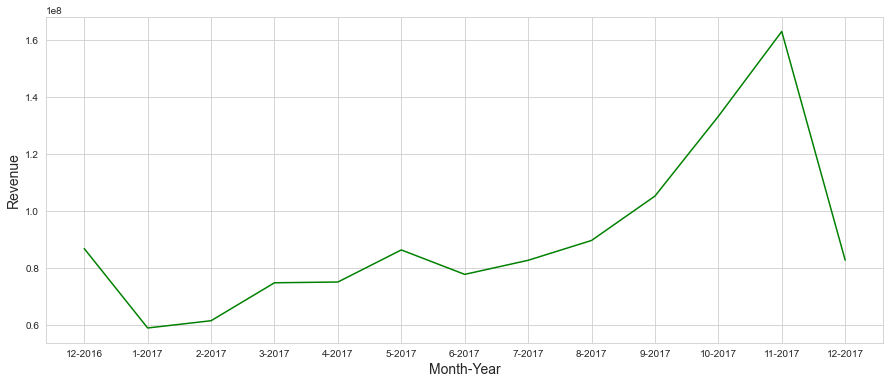

In [118]:
plt.figure(figsize=(15,6))

plt.plot(df_month_agg["Month_Year_wise"],df_month_agg["Price"], color='green')

plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Revenue", fontsize=14);

- we can see that Revenue increases exponentially after mid-year till November 2017.
- After Nov-2017 revenue drops suddenly suggesting stocks might be over.

#### Merging Date of Purchase and time

In [13]:
df['Date of purchase'] = df['Date of purchase'].astype(str) + ' ' + df['Time'].astype('str')
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])
df

C:\Users\ganesh\AppData\Local\Temp/ipykernel_3164/3250653062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date of purchase'] = df['Date of purchase'].astype(str) + ' ' + df['Time'].astype('str')


In [38]:
df['Hour'] = df['Date of purchase'].dt.time.astype('str')
df.Hour = df.Hour.str.slice(0,2).astype(int)

#dropping Time and Year column
df.drop(['Time','Year'],axis=1,inplace=True)
df.head()

C:\Users\ganesh\AppData\Local\Temp/ipykernel_3164/33098734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Date of purchase'].dt.time.astype('str')


,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,price per Unit,Price,Shipping Location,Month,Year,Month_Year_wise,Hour
0,4355.0,15734,398177,2017-10-29 15:36:00,6,321.0,1926.0,Location 1,10,2017,10-2017,15:36:00
1,4352.0,14616,394422,2017-10-05 14:53:00,2,870.0,1740.0,Location 1,10,2017,10-2017,14:53:00
2,4352.0,14614,394422,2017-10-12 14:53:00,2,933.0,1866.0,Location 1,10,2017,10-2017,14:53:00
3,4352.0,85014B,388633,2017-08-22 14:47:00,3,623.0,1869.0,Location 1,8,2017,8-2017,14:47:00
4,4352.0,15364,394422,2017-10-10 14:53:00,2,944.0,1888.0,Location 1,10,2017,10-2017,14:53:00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


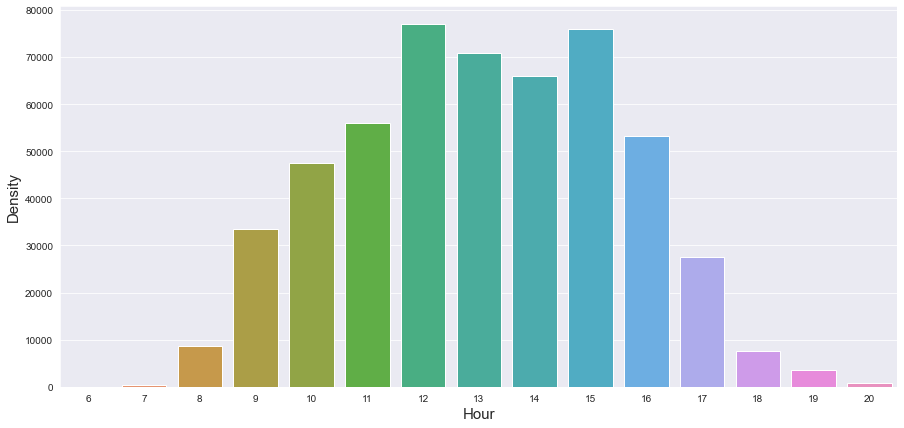

In [53]:
plt.figure(figsize=(15,7))

sns.countplot(df["Hour"], data=df)

plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Density", fontsize = 15);

- The buying hours are high in afternoon after 11 AM till 3 PM
- Store is open from 6 AM to 8 PM

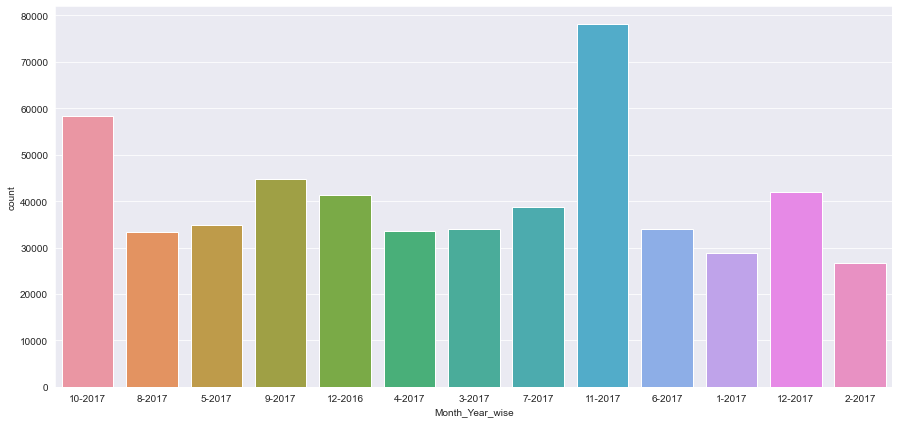

In [74]:
plt.figure(figsize=(15,7))
sns.countplot(x=df["Month_Year_wise"]);

- We can see most of the purchases are at the Year end of 2017 with Nov-2017 having the highest number of sales

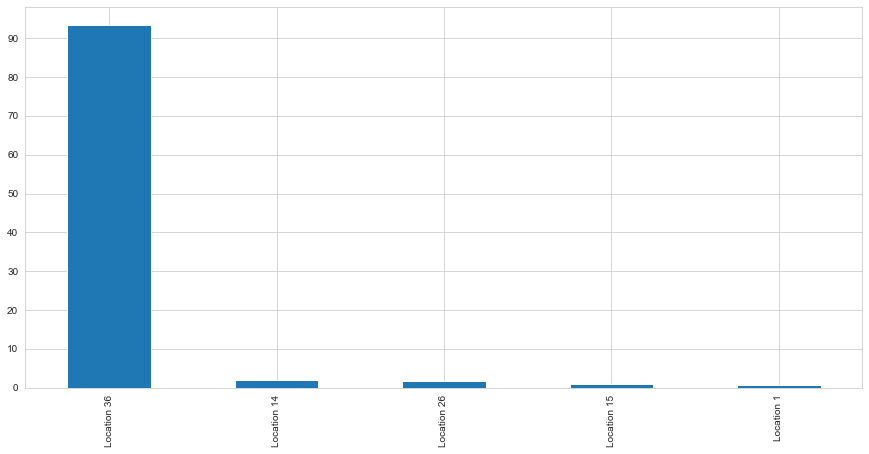

In [117]:
plt.figure(figsize = (15,7))
sns.set_style('whitegrid')

(df['Shipping Location'].value_counts(normalize = True)*100).head().plot(kind = 'bar');

plt.yticks(np.arange(0,100,10));

- 93% of shipping location is **Location 36**📌 which indicates maximum orders are from areas near by this location.

## Recency, Frequency & Monetary Segmentation

RFM is a behavioural customer segmentation for measuring customer value.
- Receny: How recent was each customer's last purchase
- Frequency: How many times the customer purchased in the last 12 months
- Monetary Value: How much has the customer spent in the last 12 months

## Recency 🗓️

- The most recent date of purchase of a customer will be used to calculate the recency

In [98]:
df['Date of purchase'] = df['Date of purchase'].astype('string')
df['Date of purchase'] = df['Date of purchase'].str.slice(0,10)
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

C:\Users\ganesh\AppData\Local\Temp/ipykernel_3164/217493299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date of purchase'] = pd.to_datetime(df['Date of purchase']); df


,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,price per Unit,Price,Shipping Location,Month,Year,Month_Year_wise,Hour
0,4355.0,15734,398177,2017-10-29,6,321.0,1926.0,Location 1,10,2017,10-2017,15
1,4352.0,14616,394422,2017-10-05,2,870.0,1740.0,Location 1,10,2017,10-2017,14
2,4352.0,14614,394422,2017-10-12,2,933.0,1866.0,Location 1,10,2017,10-2017,14
3,4352.0,85014B,388633,2017-08-22,3,623.0,1869.0,Location 1,8,2017,8-2017,14
4,4352.0,15364,394422,2017-10-10,2,944.0,1888.0,Location 1,10,2017,10-2017,14
...,...,...,...,...,...,...,...,...,...,...,...,...
537974,NaN,85194L,372313,2017-03-23,6,198.0,1188.0,Location 8,3,2017,3-2017,9
537975,NaN,14693,367605,2017-02-06,2,761.0,1522.0,Location 8,2,2017,2-2017,14
537976,NaN,14693,368246,2017-02-06,3,761.0,2283.0,Location 8,2,2017,2-2017,10
537977,NaN,85194L,366891,2017-01-29,15,198.0,2970.0,Location 8,1,2017,1-2017,17


In [99]:
#the latest date of purchase is:

df["Date of purchase"].max()

Timestamp('2017-12-19 00:00:00')

In [100]:
#we will take 20-12-2017 as reference date

last_date = pd.datetime(2017,12,20)
last_date

C:\Users\ganesh\AppData\Local\Temp/ipykernel_3164/495078030.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  last_date = pd.datetime(2017,12,20)


datetime.datetime(2017, 12, 20, 0, 0)

- The most recent date of purchase of customer will be considered as the reference date.
- For convenience we will consider last date as the one day ahead of most recent date of purchase.

In [101]:
df_New = df.copy()

In [102]:
df_New.dropna(inplace=True)

- By doing groupby on the customerID and taking maximum of Date of puchase will give the last purchase date of customer

In [103]:
df_Recency = df_New.groupby("CustomerID", as_index=False).agg({"Date of purchase":"max"})
df_Recency

,CustomerID,Date of purchase
0,2.0,2017-12-16
1,3.0,2017-10-04
2,4.0,2017-12-01
3,5.0,2017-02-12
4,6.0,2017-11-13
...,...,...
4319,4368.0,2017-03-17
4320,4369.0,2017-06-22
4321,4370.0,2017-12-11
4322,4371.0,2017-12-16


In [119]:
# subtracting the latest date of purchase with reference date to get Recency

df_Recency["Recency"] = (last_date - df_Recency["Date of purchase"]).dt.days
df_Recency

,CustomerID,Date of purchase,Recency
0,2.0,2017-12-16,4
1,3.0,2017-10-04,77
2,4.0,2017-12-01,19
3,5.0,2017-02-12,311
4,6.0,2017-11-13,37
...,...,...,...
4319,4368.0,2017-03-17,278
4320,4369.0,2017-06-22,181
4321,4370.0,2017-12-11,9
4322,4371.0,2017-12-16,4


## Monetary 💰

- By doing groupby on CustomerID and taking sum of Price will give the total monetary spent by customer

In [120]:
df_Monetary = df_New.groupby("CustomerID").agg({"Price":"sum"})
df_Monetary

,Price
CustomerID,
2.0,553704.0
3.0,257404.0
4.0,176613.0
5.0,41976.0
6.0,166972.0
...,...
4368.0,20480.0
4369.0,10774.0
4370.0,25177.0


# Frequency ∿

- Finding Frequency of Customers is challenging.
- Since there are same InvoiceNo for different dates, its tricky to get the frequency.
- InvoiceNo are generated on basis of time of purchase irrespective of date of purchase.

- By combining the Date of purchase and InvoiceNo, we can get the unique combination through which we can find frequency

In [122]:
df_New['DoP_IvNo'] = df_New['Date of purchase'].astype('string') + '_' + df_New['InvoiceNo'].astype('string')
df_New

,CustomerID,Item Code,InvoiceNo,Date of purchase,Quantity,price per Unit,Price,Shipping Location,Month,Year,Month_Year_wise,Hour,DoP_IvNo
0,4355.0,15734,398177,2017-10-29,6,321.0,1926.0,Location 1,10,2017,10-2017,15,2017-10-29_398177
1,4352.0,14616,394422,2017-10-05,2,870.0,1740.0,Location 1,10,2017,10-2017,14,2017-10-05_394422
2,4352.0,14614,394422,2017-10-12,2,933.0,1866.0,Location 1,10,2017,10-2017,14,2017-10-12_394422
3,4352.0,85014B,388633,2017-08-22,3,623.0,1869.0,Location 1,8,2017,8-2017,14,2017-08-22_388633
4,4352.0,15364,394422,2017-10-10,2,944.0,1888.0,Location 1,10,2017,10-2017,14,2017-10-10_394422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537945,37.0,14693,402292,2017-11-28,1,384.0,384.0,Location 8,11,2017,11-2017,12,2017-11-28_402292
537946,37.0,14693,402292,2017-11-27,1,398.0,398.0,Location 8,11,2017,11-2017,12,2017-11-27_402292
537947,21.0,77618,363890,2016-12-21,8,308.0,2464.0,Location 8,12,2016,12-2016,12,2016-12-21_363890
537948,21.0,85194L,363890,2016-12-21,36,113.0,4068.0,Location 8,12,2016,12-2016,12,2016-12-21_363890


- By doing groupby on CustomerID and taking nunique of the DoP_IvNo we can get frequency

In [123]:
df_Frequency = df_New.groupby("CustomerID",as_index=False).agg({"DoP_IvNo":"nunique"})
df_Frequency

,CustomerID,DoP_IvNo
0,2.0,63
1,3.0,18
2,4.0,10
3,5.0,7
4,6.0,44
...,...,...
4319,4368.0,7
4320,4369.0,6
4321,4370.0,10
4322,4371.0,141


##### Combining all three Recency, Frequency and Monetary dataframes

In [124]:
df_RF = pd.merge(df_Recency,df_Frequency,on="CustomerID",how="inner")

,CustomerID,Date of purchase,Recency,DoP_IvNo
0,2.0,2017-12-16,4,63
1,3.0,2017-10-04,77,18
2,4.0,2017-12-01,19,10
3,5.0,2017-02-12,311,7
4,6.0,2017-11-13,37,44
...,...,...,...,...
4319,4368.0,2017-03-17,278,7
4320,4369.0,2017-06-22,181,6
4321,4370.0,2017-12-11,9,10
4322,4371.0,2017-12-16,4,141


In [125]:
df_RFM = pd.merge(df_RF,df_Monetary,on="CustomerID",how="inner")
df_RFM

,CustomerID,Date of purchase,Recency,DoP_IvNo,Price
0,2.0,2017-12-16,4,63,553704.0
1,3.0,2017-10-04,77,18,257404.0
2,4.0,2017-12-01,19,10,176613.0
3,5.0,2017-02-12,311,7,41976.0
4,6.0,2017-11-13,37,44,166972.0
...,...,...,...,...,...
4319,4368.0,2017-03-17,278,7,20480.0
4320,4369.0,2017-06-22,181,6,10774.0
4321,4370.0,2017-12-11,9,10,25177.0
4322,4371.0,2017-12-16,4,141,280608.0


In [126]:
#changing the names of columns

df_RFM.rename(columns={"DoP_IvNo":"Frequency","Price":"Monetary"},inplace=True)
df_RFM

,CustomerID,Date of purchase,Recency,Frequency,Monetary
0,2.0,2017-12-16,4,63,553704.0
1,3.0,2017-10-04,77,18,257404.0
2,4.0,2017-12-01,19,10,176613.0
3,5.0,2017-02-12,311,7,41976.0
4,6.0,2017-11-13,37,44,166972.0
...,...,...,...,...,...
4319,4368.0,2017-03-17,278,7,20480.0
4320,4369.0,2017-06-22,181,6,10774.0
4321,4370.0,2017-12-11,9,10,25177.0
4322,4371.0,2017-12-16,4,141,280608.0


### The RFM dataframe

- This Table contains the Recency, Frequency & Monetary of each customer
- Note that since we made a groupby on CustomerID, the 24% of null CustomerID entries are automatically removed since segmentation cannot be done without their id's

In [128]:
df_RFM.drop(columns="Date of purchase",inplace=True)
df_RFM

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,19,10,176613.0
3,5.0,311,7,41976.0
4,6.0,37,44,166972.0
...,...,...,...,...
4319,4368.0,278,7,20480.0
4320,4369.0,181,6,10774.0
4321,4370.0,9,10,25177.0
4322,4371.0,4,141,280608.0


### RFM Scores🎯

- Now that we have R,F & M values of each customer, we can segment them into differenct categories based on their RFM Scores
- We will assign them scores based on where their RFM values are in quantiles

In [129]:
Quantiles = df_RFM.quantile(q=[0.25,0.50,0.75])
Quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,1092.75,19.00,9.0,39288.00
0.50,2182.50,52.00,16.5,86147.00
0.75,3279.25,143.25,34.0,210833.75


In [130]:
Segmented_RFM = df_RFM.copy()

#### We will create Two functions which will assign each customer their scores based on RFM values

**Recency Score**
- 4 will be the highest rating and 1 is lowest.
- lower values will lead to higher scores in case of Recency. Because more recent the customer, better the score
- Hence if recency is lower than 1st quantile, best score and so on.

In [131]:
def RScore(data,columns,Quantiles):
    """
    This function will give scores ranging from 1-4 with 4 being the best score 
    based on where Recency values lie in  quantiles
    
    """
    
    if data<=Quantiles[columns][0.25]:
        return 4
    elif data<=Quantiles[columns][0.5]:
        return 3
    elif data<=Quantiles[columns][0.75]:
        return 2
    else:
        return 1
    

**Frequency & Monetary Score**
- Higher values will lead to higher scores in case of Frequency and Monetary. Because more Frequent & high Spending the customer, better the score.
- Hence if frequency or monetary is higher than 3rd quantile, best score and so on.

In [132]:
def FMScore(data,columns,Quantiles):
    """
    This function will give scores ranging from 1-4 with 4 being the best score 
    based on where Frequency & Monetary values lie in  quantiles
    
    """
    
    if data<=Quantiles[columns][0.25]:
        return 1
    elif data<=Quantiles[columns][0.5]:
        return 2
    elif data<=Quantiles[columns][0.75]:
        return 3
    else:
        return 4

In [133]:
#assigning RFM Scores

Segmented_RFM["Recency_Quartile"]   = Segmented_RFM["Recency"].apply(RScore,args=("Recency",Quantiles))
Segmented_RFM["Frequency_Quartile"] = Segmented_RFM["Frequency"].apply(FMScore,args=("Frequency",Quantiles))
Segmented_RFM["Monetary_Quartile"]  = Segmented_RFM["Monetary"].apply(FMScore,args=("Monetary",Quantiles))
Segmented_RFM

,CustomerID,Recency,Frequency,Monetary,Recency_Quartile,Frequency_Quartile,Monetary_Quartile
0,2.0,4,63,553704.0,4,4,4
1,3.0,77,18,257404.0,2,3,4
2,4.0,19,10,176613.0,4,2,3
3,5.0,311,7,41976.0,1,1,2
4,6.0,37,44,166972.0,3,4,3
...,...,...,...,...,...,...,...
4319,4368.0,278,7,20480.0,1,1,1
4320,4369.0,181,6,10774.0,1,1,1
4321,4370.0,9,10,25177.0,4,2,1
4322,4371.0,4,141,280608.0,4,4,4


In [134]:
#adding scores

Segmented_RFM["RFM_Score"] = (Segmented_RFM["Recency_Quartile"]+
                              Segmented_RFM["Frequency_Quartile"]+
                              Segmented_RFM["Monetary_Quartile"])

In [135]:
Segmented_RFM

,CustomerID,Recency,Frequency,Monetary,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFM_Score
0,2.0,4,63,553704.0,4,4,4,12
1,3.0,77,18,257404.0,2,3,4,9
2,4.0,19,10,176613.0,4,2,3,9
3,5.0,311,7,41976.0,1,1,2,4
4,6.0,37,44,166972.0,3,4,3,10
...,...,...,...,...,...,...,...,...
4319,4368.0,278,7,20480.0,1,1,1,3
4320,4369.0,181,6,10774.0,1,1,1,3
4321,4370.0,9,10,25177.0,4,2,1,7
4322,4371.0,4,141,280608.0,4,4,4,12


#### Now we split all customers based on final RFM_Score

In [139]:
# Summary Metrics as per RFM_Score

Segmented_RFM.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']})

Recency   Frequency       Monetary      
                 mean        mean           mean count
RFM_Score                                             
3          262.011416    5.664384   20906.705479   438
4          186.247664    7.336449   33603.093458   428
5          125.551653    8.772727   46231.066116   484
6           96.081633   11.034014   63424.206576   441
7           86.650367   14.931540   99145.188264   409
8           61.707207   20.033784  120137.128378   444
9           45.701754   26.235589  175209.844612   399
10          33.968447   35.405340  237086.631068   412
11          23.414365   55.588398  472368.121547   362
12           8.362919  105.153846  996815.209073   507

- As score increases, we get better customers with good recency, frequency & monetary values

#### Creating Customer Segments

In [142]:
def segment(df):
    """
    This function will assign Categories to each cusotmer based on their RFM_Score.
    Returns: Gold, Silver or Bronze
    
    """
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze' 

In [144]:
# Categorizing the Customers

Segmented_RFM['Category'] = Segmented_RFM.apply(segment, axis=1)
Segmented_RFM

,CustomerID,Recency,Frequency,Monetary,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFM_Score,Category
0,2.0,4,63,553704.0,4,4,4,12,Gold
1,3.0,77,18,257404.0,2,3,4,9,Gold
2,4.0,19,10,176613.0,4,2,3,9,Gold
3,5.0,311,7,41976.0,1,1,2,4,Bronze
4,6.0,37,44,166972.0,3,4,3,10,Gold
...,...,...,...,...,...,...,...,...,...
4319,4368.0,278,7,20480.0,1,1,1,3,Bronze
4320,4369.0,181,6,10774.0,1,1,1,3,Bronze
4321,4370.0,9,10,25177.0,4,2,1,7,Silver
4322,4371.0,4,141,280608.0,4,4,4,12,Gold


In [145]:
Segmented_RFM.groupby('Category', as_index=False).agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']})

Category     Recency  Frequency       Monetary      
                  mean       mean           mean count
0   Bronze  224.566975   6.490762   27181.594688   866
1     Gold   26.753571  58.625595  502363.685119  1680
2   Silver   93.350394  13.562430   81123.272272  1778

In [147]:
Segmented_RFM.Category.value_counts()

Silver    1778
Gold      1680
Bronze     866
Name: Category, dtype: int64

### Checking Distribution of Data for Clustering 📊

In [153]:
df_RFM_2 = df_RFM.copy()

In [156]:
Quantiles = df_RFM.quantile(q=[0.25,0.50,0.75])
Quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,1092.75,19.00,9.0,39288.00
0.50,2182.50,52.00,16.5,86147.00
0.75,3279.25,143.25,34.0,210833.75


Outliers in Monetary

In [159]:
q1_M = 39288
q2_M = 86147
q3_M = 210833.75

IQR_M = q3_M - q1_M

UW_M = q3_M + 1.5*IQR_M
LW_M = q1_M - 1.5*IQR_M

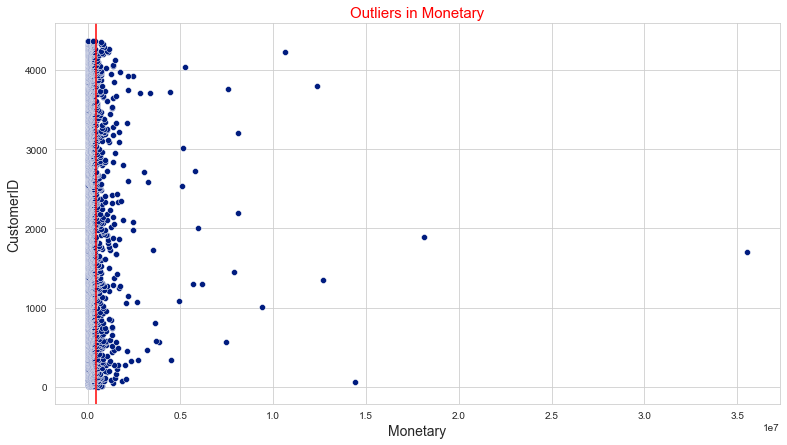

In [174]:
plt.figure(figsize = (13,7))
plt.style.use('seaborn-dark-palette')

sns.scatterplot(y = df_RFM_2.CustomerID, x = df_RFM_2.Monetary)

plt.axvline(UW_M, color='red')
plt.xlabel('Monetary', size = 14)
plt.ylabel('CustomerID', size = 14)
plt.title('Outliers in Monetary', size = 15, color = 'red');

- The points above the red line are outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


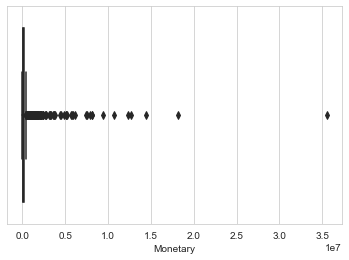

In [183]:
sns.boxplot(df_RFM_2["Monetary"]);

Outliers in Frequency

In [166]:
q1_F = 9
q2_F = 16.5
q3_F = 34

IQR_F = q3_F - q1_F

UW_F = q3_F + 1.5*IQR_F
LW_F = q1_F - 1.5*IQR_F

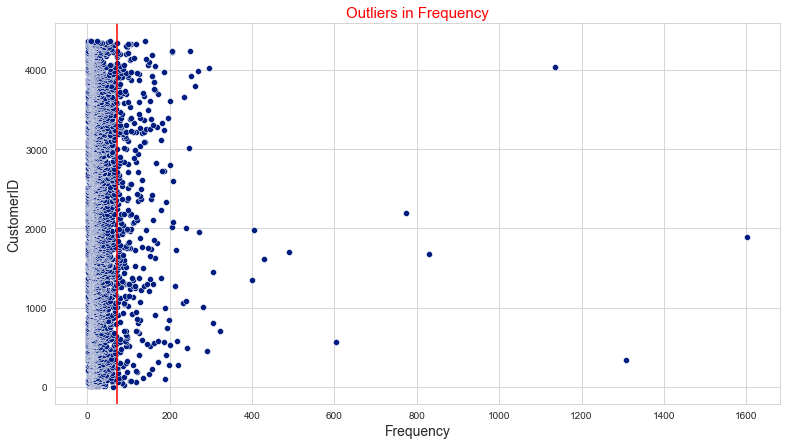

In [175]:
plt.figure(figsize = (13,7))
plt.style.use('seaborn-dark-palette')

sns.scatterplot(y = df_RFM_2.CustomerID, x = df_RFM_2.Frequency)

plt.axvline(UW_F, color='red')
plt.xlabel('Frequency', size = 14)
plt.ylabel('CustomerID', size = 14)
plt.title('Outliers in Frequency', size = 15, color = 'red');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


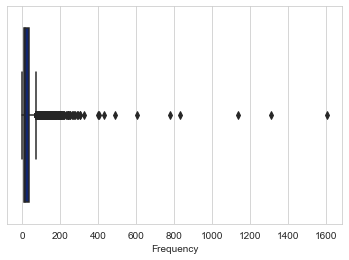

In [184]:
sns.boxplot(df_RFM_2["Frequency"]);

Outliers in Recency

In [189]:
q1_R = 19
q2_R = 52
q3_R = 143.25

IQR_R = q3_R - q1_R

UW_R = q3_R + 1.5*IQR_R
LW_R = q1_R - 1.5*IQR_R

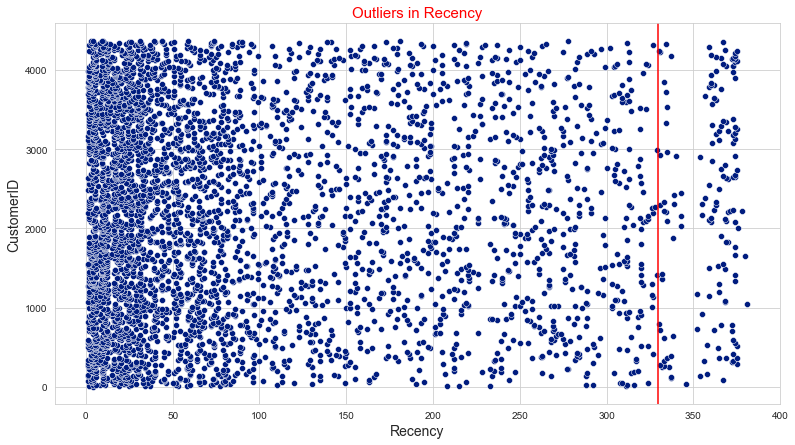

In [191]:
plt.figure(figsize = (13,7))
plt.style.use('seaborn-dark-palette')

sns.scatterplot(y = df_RFM_2.CustomerID, x = df_RFM_2.Recency)

plt.axvline(UW_R, color='red')
plt.xlabel('Recency', size = 14)
plt.ylabel('CustomerID', size = 14)
plt.title('Outliers in Recency', size = 15, color = 'red');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


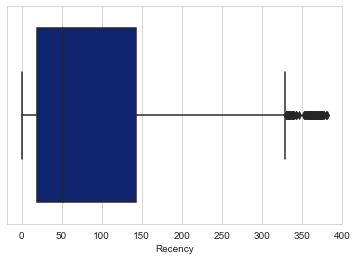

In [192]:
sns.boxplot(df_RFM_2["Recency"]);

## Data Preprocessing and Clustering

K-Means assume symmertical distribution of varibles and variables have equal average value and std.
- If the distribution is not symmetrical we can use one the method:
    1. Log transformation (if all values are positive)
    2. Add the absolute value of the lowest negative value to each observation, and then with a small constant (e.g. 1) to force all variables to be positive
    3. Use a cube root transformation
- If the mean and variables are not equal, the variables could be standardised

### Reducing Skewness

In [199]:
def check_skew(df, column):
    
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: 1.2445003479911048, : SkewtestResult(statistic=26.54754875566553, pvalue=2.7411410539914128e-155)
Frequency's: Skew: 13.644103223837913, : SkewtestResult(statistic=77.2138542847944, pvalue=0.0)
Monetary's: Skew: 22.360387440743015, : SkewtestResult(statistic=88.07599487100126, pvalue=0.0)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


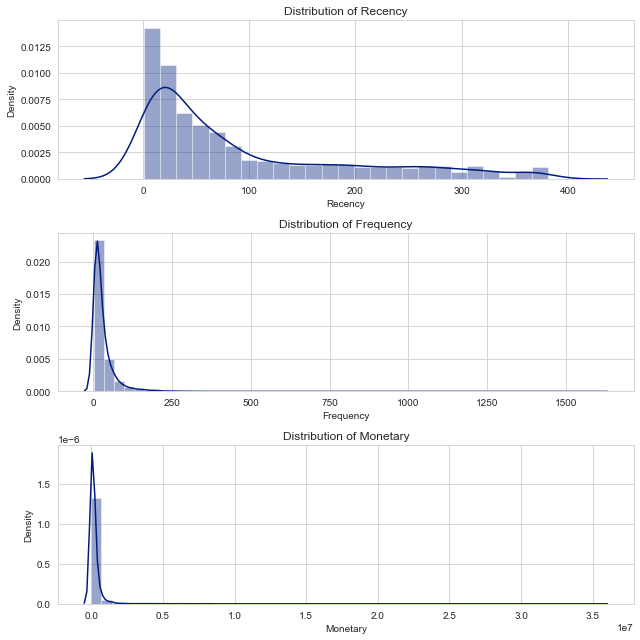

In [200]:
from scipy import stats

# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_RFM,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_RFM,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_RFM,'Monetary')

plt.tight_layout()
# plt.savefig('before_transform.png', format='png', dpi=1000)

In [201]:
df_RFM.describe()

,CustomerID,Recency,Frequency,Monetary
count,4324.000000,4324.000000,4324.000000,4.324000e+03
mean,2185.346438,93.755319,29.654487,2.339841e+05
std,1261.594396,100.115549,53.918393,8.636663e+05
min,2.000000,1.000000,1.000000,3.880000e+02
25%,1092.750000,19.000000,9.000000,3.928800e+04
50%,2182.500000,52.000000,16.500000,8.614700e+04
75%,3279.250000,143.250000,34.000000,2.108338e+05
max,4372.000000,381.000000,1602.000000,3.553619e+07


In [202]:
# Copy original to new df
df_rfm_log = df_RFM.copy()

# Data Pre-Processing for Negative Value
df_rfm_log['Monetary'] = (df_rfm_log['Monetary'] - df_rfm_log['Monetary'].min()) + 1

df_rfm_log.describe()

,CustomerID,Recency,Frequency,Monetary
count,4324.000000,4324.000000,4324.000000,4.324000e+03
mean,2185.346438,93.755319,29.654487,2.335971e+05
std,1261.594396,100.115549,53.918393,8.636663e+05
min,2.000000,1.000000,1.000000,1.000000e+00
25%,1092.750000,19.000000,9.000000,3.890100e+04
50%,2182.500000,52.000000,16.500000,8.576000e+04
75%,3279.250000,143.250000,34.000000,2.104468e+05
max,4372.000000,381.000000,1602.000000,3.553581e+07


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: -0.43404090952779395, : SkewtestResult(statistic=-11.184620228576883, pvalue=4.849772456422349e-29)
Frequency's: Skew: 0.07550839224751499, : SkewtestResult(statistic=2.0276735679041034, pvalue=0.04259357506191954)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Monetary's: Skew: 0.04270924951828174, : SkewtestResult(statistic=1.1479998928734862, pvalue=0.2509686080565734)


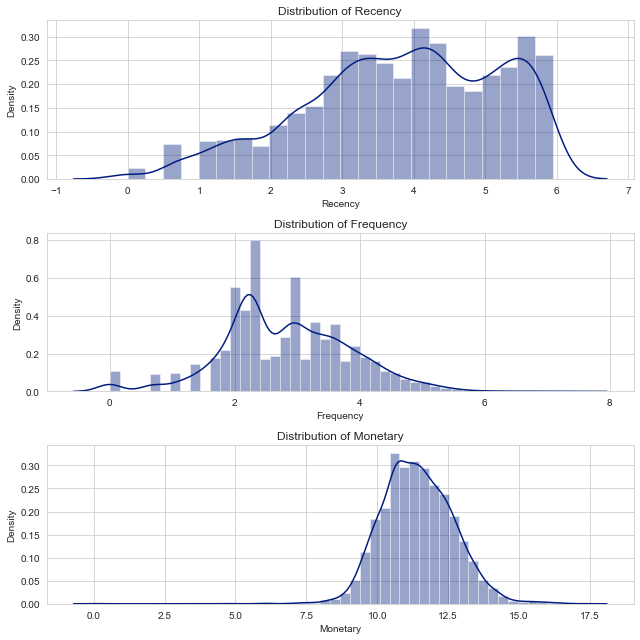

In [203]:
# Transform skewed data with log tranasformation
df_rfm_log = np.log(df_rfm_log)

# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout();
# plt.savefig('after_transform.png', format='png', dpi=1000)

### Centering and Scaling

- KMeans or any algorithm gives more importance to the higher magnitude feature relative to smaller magnitude features.
- To avoid this, we use scaling methods which brings all features to the same level.

In [204]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_rfm_normal = scaler.transform(df_rfm_log)

df_rfm_normal = pd.DataFrame(df_rfm_normal, index=df_rfm_log.index, columns=df_rfm_log.columns)

# Check result after standardising
df_rfm_normal.describe().round(3)

,CustomerID,Recency,Frequency,Monetary
count,4324.000,4324.000,4324.000,4324.000
mean,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000
min,-6.762,-2.836,-2.756,-9.011
25%,-0.393,-0.656,-0.615,-0.670
50%,0.307,0.089,-0.024,-0.047
75%,0.718,0.840,0.680,0.662
max,1.009,1.564,4.435,4.710


# K-Means Clustering

## Finding Optimal Number of Clusters

There are two primary methods to define number of clusters:
- Elbow criterion (visual method)
    - Plot number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster cente
<br><br>
- Silhouette Score (math method)
    - Measures intra- and inter-cluster distance

In [205]:
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values of Inertia and Silhouette Score.
        Lineplot of values of Inertia and Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            round((km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]),3),
            inertia_score, 
            round((inertia[n_clusters - start] - inertia[n_clusters - start - 1]),3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.336, SS Delta: 0.0, Inertia: 10829.38, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.339, SS Delta: 0.003, Inertia: 8688.28, Inertia Delta: -2141.1
No. Clusters: 4, Silhouette Score(SS): 0.26, SS Delta: -0.079, Inertia: 7245.8, Inertia Delta: -1442.48
No. Clusters: 5, Silhouette Score(SS): 0.248, SS Delta: -0.012, Inertia: 6470.97, Inertia Delta: -774.83
No. Clusters: 6, Silhouette Score(SS): 0.226, SS Delta: -0.022, Inertia: 5884.18, Inertia Delta: -586.79
No. Clusters: 7, Silhouette Score(SS): 0.23, SS Delta: 0.004, Inertia: 5369.01, Inertia Delta: -515.17
No. Clusters: 8, Silhouette Score(SS): 0.236, SS Delta: 0.006, Inertia: 4980.41, Inertia Delta: -388.6
No. Clusters: 9, Silhouette Score(SS): 0.235, SS Delta: -0.001, Inertia: 4624.18, Inertia Delta: -356.23
No. Clusters: 10, Silhouette Score(SS): 0.23, SS Delta: -0.005, Inertia: 4319.15, Inertia Delta: -305.03


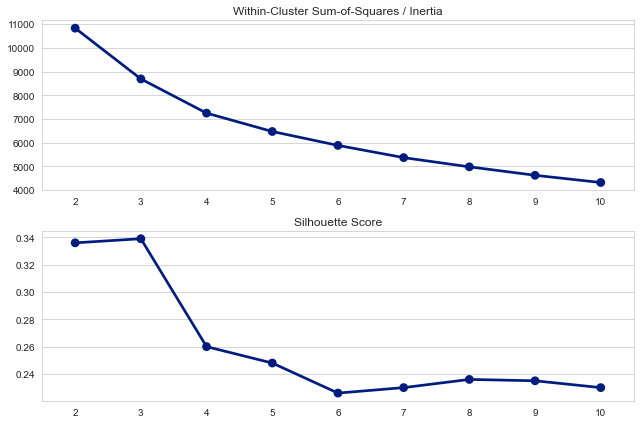

In [206]:
from sklearn.metrics import silhouette_score

optimal_kmeans(df_rfm_normal)

Based on the inertia and silhouette score, the optimal number of cluster is 3. However, during the implemention of KMEans, cluster of 4, 5, and 6 will be tested to experiment which cluster makes most business sense.

## Implementing KMeans 

In [207]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        normalised_df_rfm : dataframe. Normalised rfm dataset for k-means to fit.
        clusters_number   : int. Number of clusters to form.
        original_df_rfm   : dataframe. Original rfm dataset to assign the labels to.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

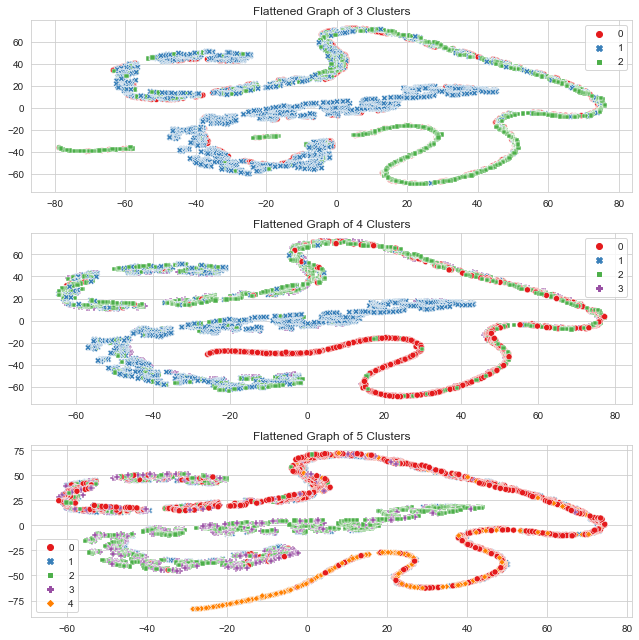

In [210]:
from sklearn.manifold import TSNE

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(df_rfm_normal, 3, df_RFM)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(df_rfm_normal, 4, df_RFM)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(df_rfm_normal, 5, df_RFM)

plt.tight_layout()
# plt.savefig('flattened.png', format='png', dpi=1000)

## Summary Statistics

In [211]:
def rfm_values(df):
    '''
    Calcualte average RFM values and size for each cluster

    '''
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [212]:
rfm_values(df_rfm_k3)

Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0          83.0      24.0  232358.0   514
1         145.0      10.0   53472.0  2188
2          29.0      58.0  478002.0  1622

In [213]:
rfm_values(df_rfm_k4)

Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0          14.0      85.0  766444.0   843
1         177.0       7.0   36017.0  1453
2          61.0      23.0  134409.0  1558
3          86.0      22.0  221050.0   470

In [215]:
rfm_values(df_rfm_k5)

Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0          79.0      29.0  185510.0  1129
1          89.0      22.0  225285.0   422
2         200.0       7.0   37407.0  1250
3          26.0      12.0   58198.0   767
4          11.0      88.0  814603.0   756

## Snake Plots 🐍

In [216]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    '''
    Transform dataframe and plot snakeplot
    '''
    # Transform df_normal as df and add cluster column
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_RFM.index, 
                                       columns=df_RFM.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

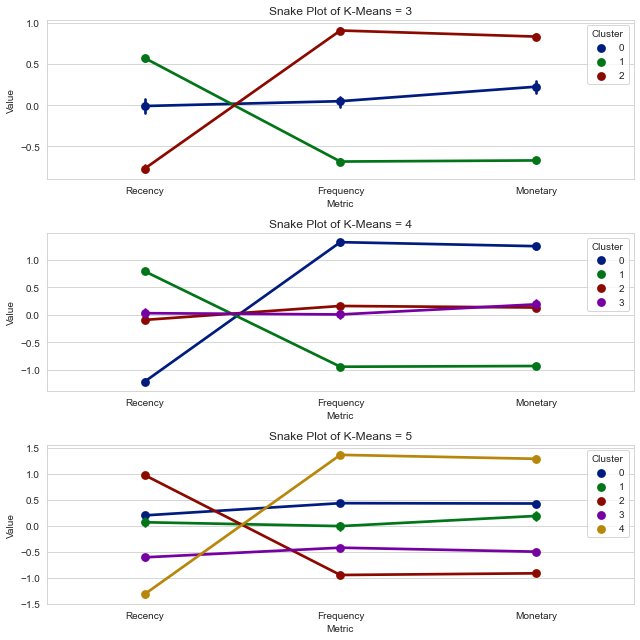

In [217]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(df_rfm_normal, df_rfm_k3, df_RFM)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(df_rfm_normal, df_rfm_k4, df_RFM)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(df_rfm_normal, df_rfm_k5, df_RFM)

plt.tight_layout()

SnakePlots indicate 3 clusters are best for segmentation

- cluster 0 belongs to Silver Category
    - R, F and M are linear.
<br><br>
- cluster 1 belongs to Bronze Category
    - R is more while F & M are less.
<br><br>
- cluster 2 belongs to Gold Category
    - R is less while F & M are more.

## Relative Importance of Segment Attributes

In [218]:
def relative_importance(df_rfm_kmeans, df_rfm_original):
    '''
    Calculate relative importance of segment attributes and plot heatmap
    '''
    # Calculate average RFM values for each cluster
    cluster_avg = df_rfm_kmeans.groupby(['Cluster']).mean() 

    # Calculate average RFM values for the total customer population
    population_avg = df_RFM.mean()

    # Calculate relative importance of cluster's attribute value compared to population
    relative_imp = cluster_avg / population_avg - 1

    sns.heatmap(data=relative_imp, annot=True, fmt='.2f')

    return

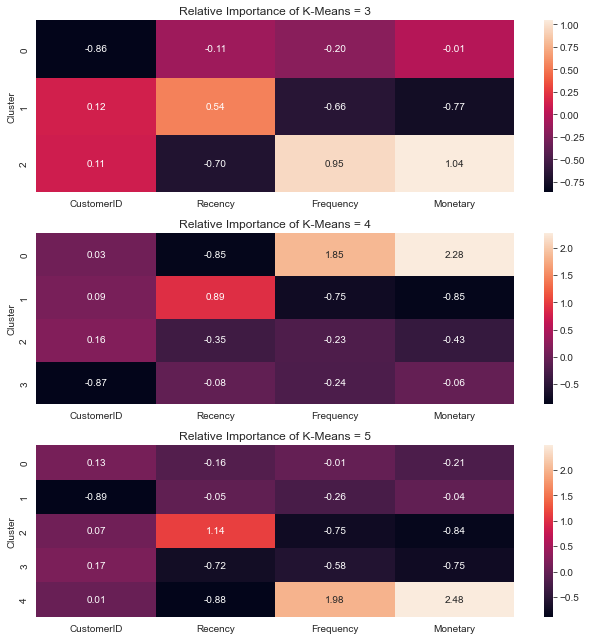

In [219]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Relative Importance of K-Means = 3')
relative_importance(df_rfm_k3, df_RFM)

plt.subplot(3, 1, 2)
plt.title('Relative Importance of K-Means = 4')
relative_importance(df_rfm_k4, df_RFM)

plt.subplot(3, 1, 3)
plt.title('Relative Importance of K-Means = 5')
relative_importance(df_rfm_k5, df_RFM)

plt.tight_layout()

#### We select k=3 as best value for k and segment customers in 3 groups. Gold, Silver & Bronze 

In [223]:
df_rfm_k3

,CustomerID,Recency,Frequency,Monetary,Cluster
0,2.0,4,63,553704.0,0
1,3.0,77,18,257404.0,0
2,4.0,19,10,176613.0,0
3,5.0,311,7,41976.0,0
4,6.0,37,44,166972.0,0
...,...,...,...,...,...
4319,4368.0,278,7,20480.0,1
4320,4369.0,181,6,10774.0,1
4321,4370.0,9,10,25177.0,1
4322,4371.0,4,141,280608.0,2


In [225]:
print(df_rfm_k3[df_rfm_k3['Cluster']==0].mean())  # Silver Category 

print('**************************')
print(df_rfm_k3[df_rfm_k3['Cluster']==1].mean()) # Bronze Category

print('**************************')
print(df_rfm_k3[df_rfm_k3['Cluster']==2].mean()) # Gold Category

CustomerID       301.92607
Recency           83.35214
Frequency         23.61284
Monetary      232357.98249
Cluster            0.00000
dtype: float64
**************************
CustomerID     2452.546618
Recency         144.537934
Frequency        10.170932
Monetary      53472.064031
Cluster           1.000000
dtype: float64
**************************
CustomerID      2421.748459
Recency           28.548705
Frequency         57.851418
Monetary      478001.572750
Cluster            2.000000
dtype: float64


In [226]:
def Category(df):
    """
    This function assigns categories to the customers based on their cluster number
    
    """
    if df['Cluster'] == 0:
        return 'Silver'
    if df['Cluster'] == 1:
        return 'Bronze'
    else:
        return 'Gold'

In [227]:
df_rfm_k3['Category'] = df_rfm_k3.apply(Category, axis = 1)

In [230]:
df_rfm_k3.drop('Cluster',axis=1,inplace=True); df_rfm_k3

,CustomerID,Recency,Frequency,Monetary,Category
0,2.0,4,63,553704.0,Silver
1,3.0,77,18,257404.0,Silver
2,4.0,19,10,176613.0,Silver
3,5.0,311,7,41976.0,Silver
4,6.0,37,44,166972.0,Silver
...,...,...,...,...,...
4319,4368.0,278,7,20480.0,Bronze
4320,4369.0,181,6,10774.0,Bronze
4321,4370.0,9,10,25177.0,Bronze
4322,4371.0,4,141,280608.0,Gold


In [231]:
df_rfm_k3.Category.value_counts()

Bronze    2188
Gold      1622
Silver     514
Name: Category, dtype: int64

###### Depending on Categories, we can suggest some points to the organization

**GOLD Customers** 🥇 
- These customers are best customer who are more recent compared to others and have high visitings and spending capability.
- Providing these customers with special services would convert them to permanent customers.
- Measures should be taken to keep these customers updated with latest services and not loose them.

**SILVER Customers** 🥈
- These customers have average spendings and frequency.
- Trying to provide them with discounts would increase their frequency and spendings as a result.
- Measure should be taken to convert them to Gold Category customers.

**BRONZE Customers** 🥉
- These customers have poor frequency, very less expenditure and almost an year old customers.
- Maybe stock availability is the problem and hence have low frequency.
- Measure should be taken to improve their recency and frequency.